# Generate electrode coordinates for Berke Lab probes

## Get electrode coordinates for custom Berke Lab silicon probes


In [ ]:
# Set up specs for all Berke Lab custom silicon probes

## 256-ch Silicon Probe, 3mm length, 66um pitch
# 32 shanks, 8 electrodes per shank. Each shank is 3mm long.
# Shanks are 66um apart. There is 30um between electrodes on each shank.
# Odd shanks are vertically offset by 1/2 the electrode pitch (15um).
# Shanks are numbered "left to right": 1 (leftmost shank) to 32 (rightmost shank).
# Electrodes are numbered "top to bottom": 1 (top, most dorsal) to 8 (tip, most ventral) on each shank.
probe_256ch_3mm_66um = {
    'num_shanks': 32,
    'electrodes_per_shank': 8,
    'shank_pitch': 66,          # um between shanks
    'electrode_pitch': 30,      # um vertically between electrodes
    'offset_odd_shanks': True,
    'top_to_bottom': True
}

## 256-ch Silicon Probe, 6mm length, 80um pitch
# 32 shanks, 8 electrodes per shank. Each shank is 6mm long.
# Shanks are 80um apart. There is 30um between electrodes on each shank.
# Odd shanks are vertically offset by 1/2 the electrode pitch (15um).
# Shanks are numbered "left to right": 1 (leftmost shank) to 32 (rightmost shank).
# Electrodes are numbered "top to bottom": 1 (top, most dorsal) to 8 (tip, most ventral) on each shank.
probe_256ch_6mm_80um = {
    'num_shanks': 32,
    'electrodes_per_shank': 8,
    'shank_pitch': 80,          # um between shanks
    'electrode_pitch': 30,      # um vertically between electrodes
    'offset_odd_shanks': True,
    'top_to_bottom': True
}

# NOTE for 256ch we start with more ventral tip on the left!!! opposite of what I currently have. so need to fix this.
# 9mm has 100 shank pitch

## 252-ch Silicon Probe, 4mm length, 80um pitch
# 21 shanks, 12 electrodes per shank. Each shank is 4mm long.
# Shanks are 80um apart. There is 25um between electrodes on each shank.
# Shanks are numbered "left to right": 1 (leftmost shank) to 21 (rightmost shank).
# Electrodes are numbered "bottom to top": 1 (tip, most ventral) to 12 (top, most dorsal) on each shank.

probe_252ch_4mm_80um = {
    'num_shanks': 21,
    'electrodes_per_shank': 12,
    'shank_pitch': 80,          # um between shanks
    'electrode_pitch': 25,      # um vertically between electrodes
    'offset_odd_shanks': True,
    'top_to_bottom': False
}

## 252-ch Silicon Probe, 10mm length, 100um pitch
# 21 shanks, 12 electrodes per shank. Each shank is 10mm long.
# Shanks are 100um apart. There is 25um between electrodes on each shank.
# Shanks are numbered "left to right": 1 (leftmost shank) to 21 (rightmost shank).
# Electrodes are numbered "bottom to top": 1 (tip, most ventral) to 12 (top, most dorsal) on each shank.
probe_252ch_10mm_100um = {
    'num_shanks': 21,
    'electrodes_per_shank': 12,
    'shank_pitch': 100,         # um between shanks
    'electrode_pitch': 25,      # um vertically between electrodes
    'offset_odd_shanks': True,
    'top_to_bottom': False
}

# Dict of all Berke Lab custom probes
probes = {
    '256-ch Silicon Probe, 3mm length, 66um pitch': probe_256ch_3mm_66um,
    '256-ch Silicon Probe, 6mm length, 80um pitch': probe_256ch_6mm_80um,
    '252-ch Silicon Probe, 4mm length, 80um pitch': probe_252ch_4mm_80um,
    '252-ch Silicon Probe, 10mm length, 100um pitch': probe_252ch_10mm_100um
}


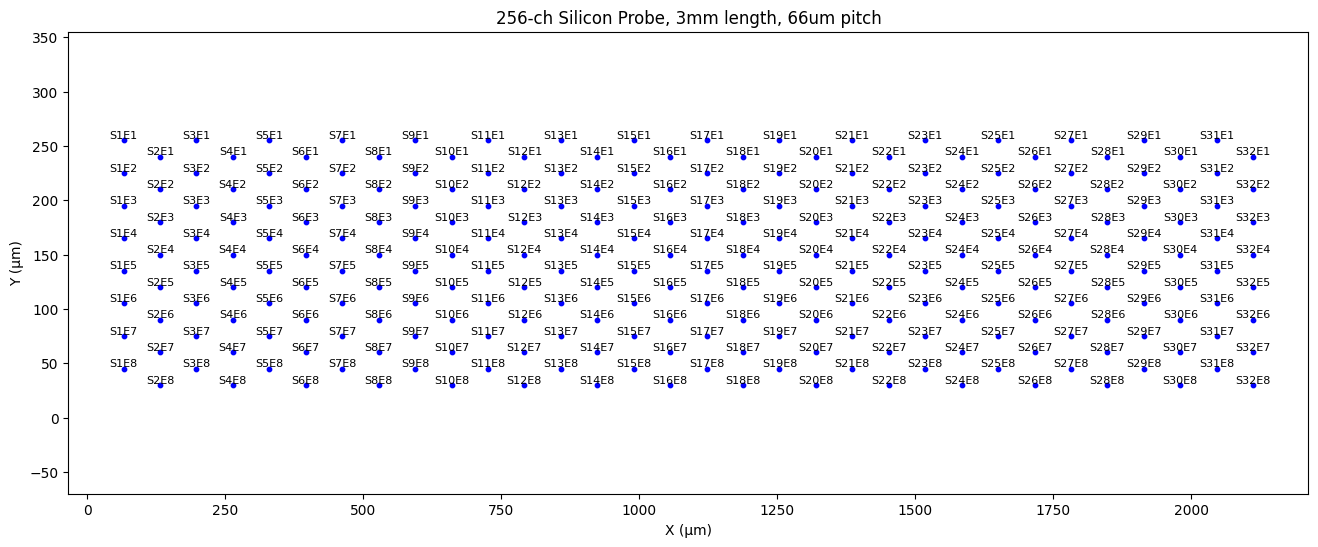

,shank,electrode,x_um,y_um
0,1,1,66,255.0
1,1,2,66,225.0
2,1,3,66,195.0
3,1,4,66,165.0
4,1,5,66,135.0
...,...,...,...,...
251,32,4,2112,150.0
252,32,5,2112,120.0
253,32,6,2112,90.0
254,32,7,2112,60.0


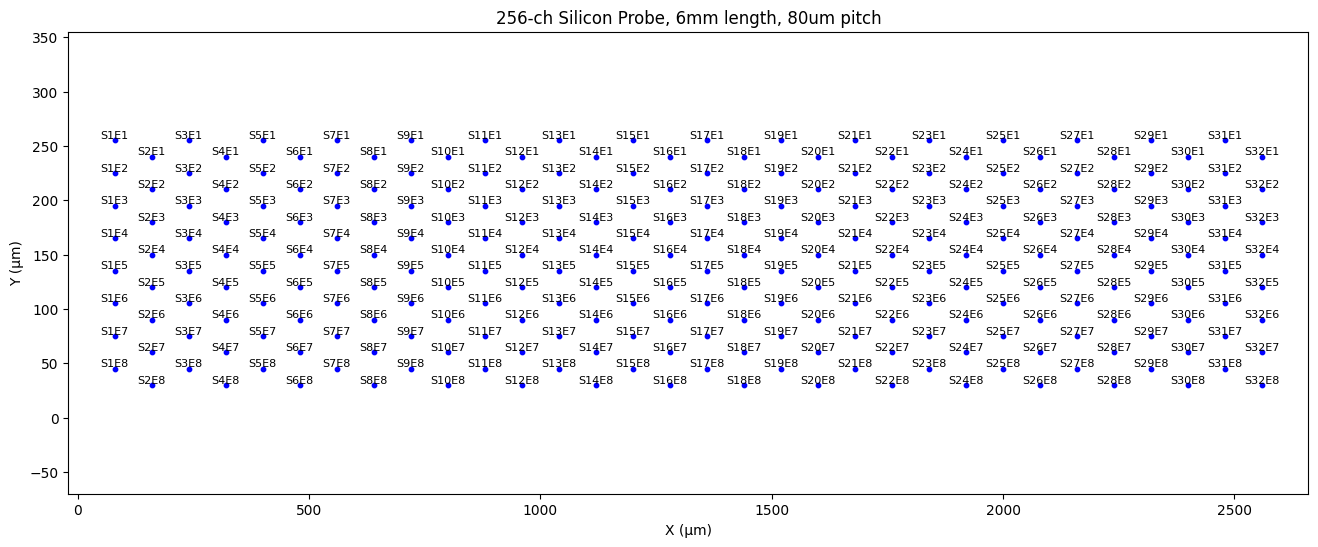

,shank,electrode,x_um,y_um
0,1,1,80,255.0
1,1,2,80,225.0
2,1,3,80,195.0
3,1,4,80,165.0
4,1,5,80,135.0
...,...,...,...,...
251,32,4,2560,150.0
252,32,5,2560,120.0
253,32,6,2560,90.0
254,32,7,2560,60.0


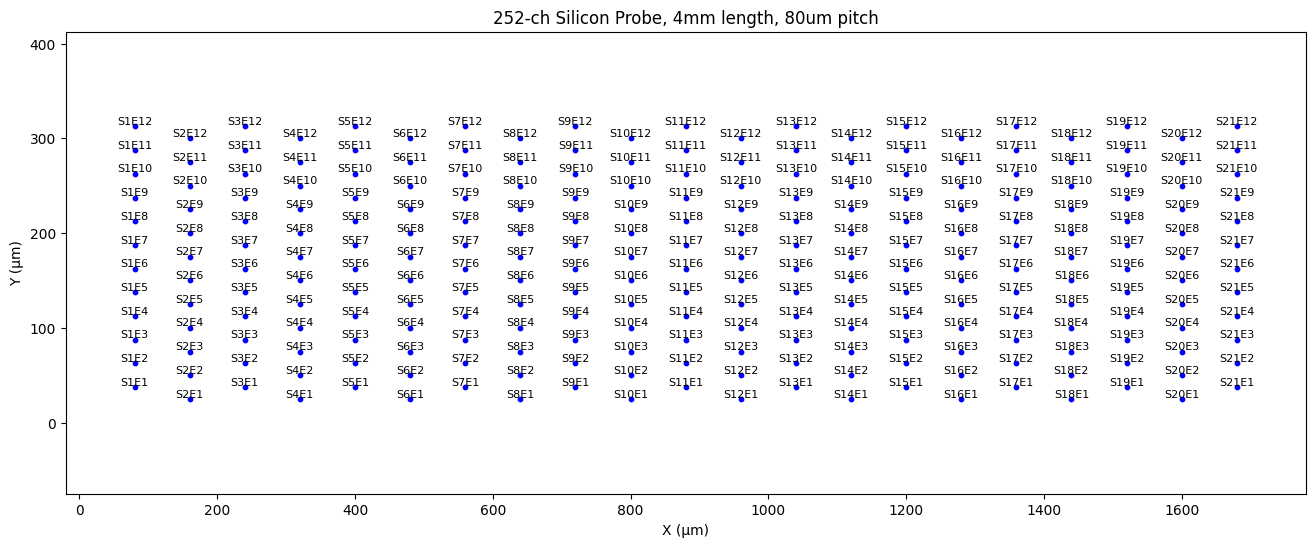

,shank,electrode,x_um,y_um
0,1,1,80,37.5
1,1,2,80,62.5
2,1,3,80,87.5
3,1,4,80,112.5
4,1,5,80,137.5
...,...,...,...,...
247,21,8,1680,212.5
248,21,9,1680,237.5
249,21,10,1680,262.5
250,21,11,1680,287.5


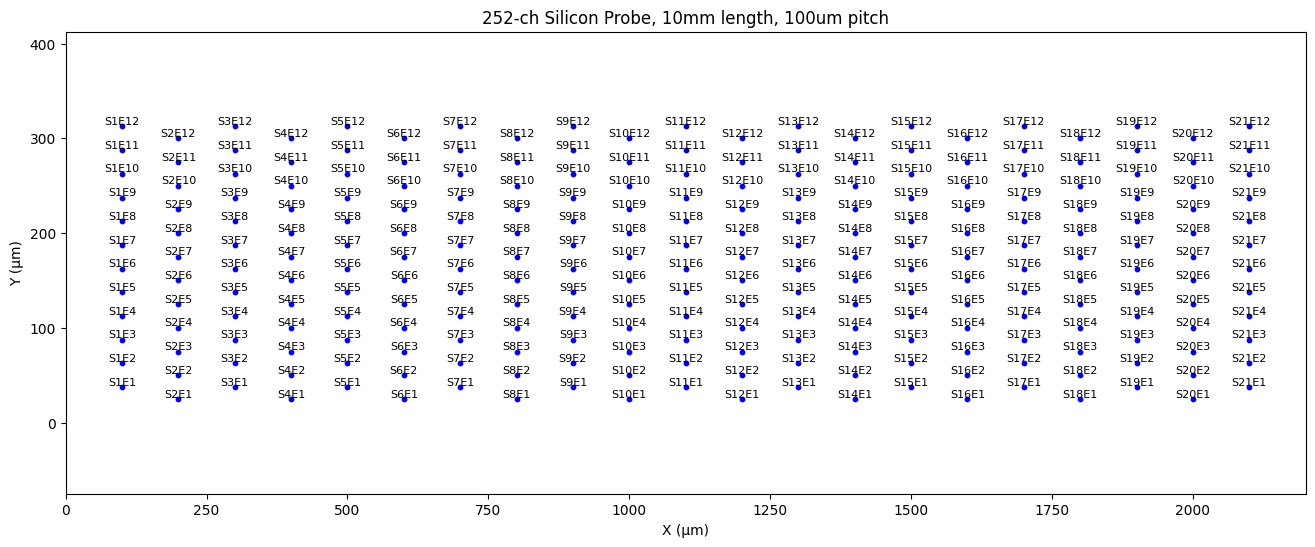

,shank,electrode,x_um,y_um
0,1,1,100,37.5
1,1,2,100,62.5
2,1,3,100,87.5
3,1,4,100,112.5
4,1,5,100,137.5
...,...,...,...,...
247,21,8,2100,212.5
248,21,9,2100,237.5
249,21,10,2100,262.5
250,21,11,2100,287.5


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def generate_electrode_coords(num_shanks, electrodes_per_shank, shank_pitch, electrode_pitch,
                               offset_odd_shanks=True, top_to_bottom=True):
    coords = []
    # Get x coordinate based on shank
    for shank in range(1, num_shanks + 1):  # 1-based shank
        x = shank * shank_pitch
        is_odd_shank = shank % 2
        vertical_offset = (electrode_pitch / 2) if (offset_odd_shanks and is_odd_shank) else 0
        # Get y coordinate based on electrode (+ y offset every other shank)
        for e in range(1, electrodes_per_shank + 1): # 1-based electrode
            y_idx = (electrodes_per_shank + 1 - e) if top_to_bottom else e
            y = y_idx * electrode_pitch + vertical_offset
            coords.append({
            "shank": shank,
            "electrode": e,
            "x_um": x,
            "y_um": y
        })
    return coords


def plot_electrode_coords(coords, title):
    x, y, labels = [], [], []
    
    for coord in coords:
        x.append(coord['x_um'])
        y.append(coord['y_um'])
        labels.append(f"S{coord['shank']}E{coord['electrode']}")
    
    plt.figure(figsize=(16, 6))
    plt.scatter(x, y, c='blue', s=10)
    
    # Add labels for each electrode
    for i, label in enumerate(labels):
        plt.text(x[i], y[i], label, fontsize=8, ha='center', va='bottom', color='black')
        
    plt.title(title)
    plt.xlim(min(x) - 100, max(x) + 100)
    plt.ylim(min(y) - 100, max(y) + 100)
    plt.xlabel("X (µm)")
    plt.ylabel("Y (µm)")
    plt.show()

# Iterate through the probes and generate coordinates and plot for each
for probe_name, probe_data in probes.items():
    coords = generate_electrode_coords(**probe_data)
    plot_electrode_coords(coords, title=probe_name)
    coords_df = pd.DataFrame(coords)
    display(coords_df)


## Get coordinates for all Neuropixels 2.0 (multishank) electrodes
4 shanks x 1280 electrodes per shank for 5120 total recording sites.

Shanks are 250um apart. There are 2 electrodes per row on each shank.

There is 15 um vertically and 32 um horizontally between electrodes on each shank.

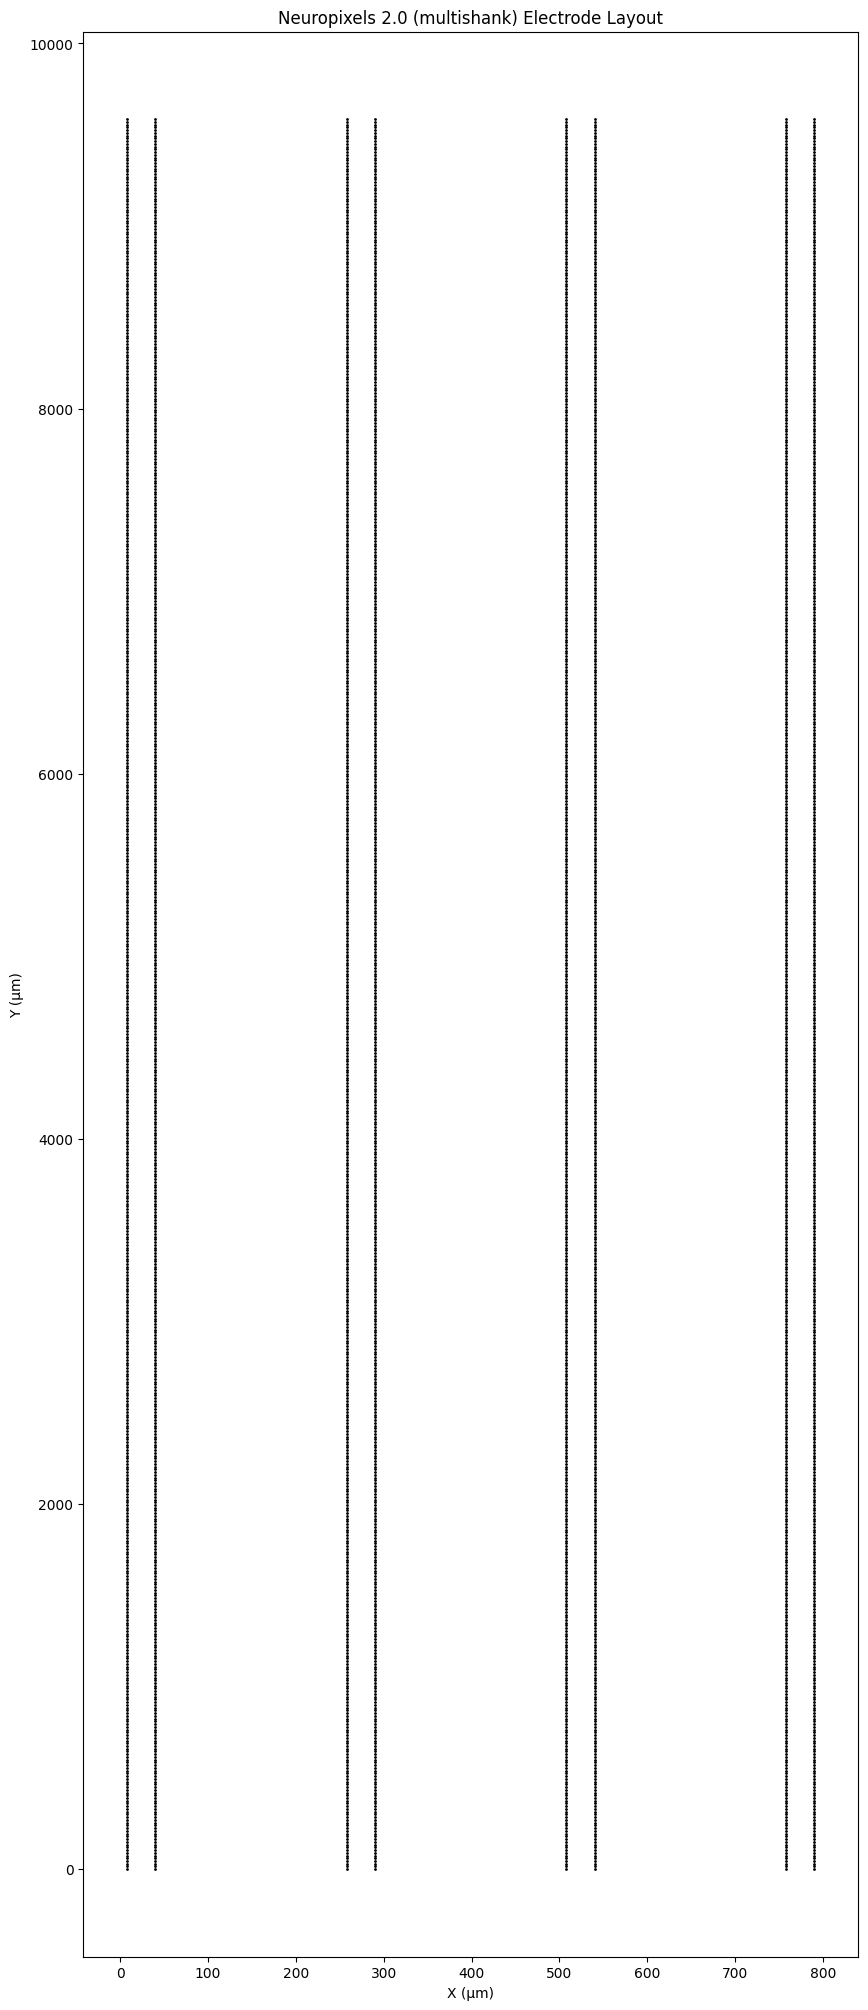

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

electrodes = []

# Specs for Neuropixels 2.0 multishank probe
num_shanks = 4
electrodes_per_shank = 1280
inter_shank_spacing = 250  # um between shanks
horizontal_spacing = 32    # um between columns
vertical_spacing = 15      # um between rows
x_offset = 8               # x coordinates start at 8 instead of 0 

for shank in range(num_shanks):
    base_index = shank * electrodes_per_shank
    for site_in_shank in range(electrodes_per_shank):
        electrode = base_index + site_in_shank
        column = site_in_shank % 2  # 0 (left), 1 (right)
        row = site_in_shank // 2

        x = shank * inter_shank_spacing + column * horizontal_spacing + x_offset
        y = row * vertical_spacing

        electrodes.append({
            "electrode": electrode,
            "shank": shank,
            "shank_column": column,
            "shank_row": row,
            "x_um": x,
            "y_um": y
        })

# Save to a csv
df = pd.DataFrame(electrodes)
#df.to_csv("neuropixels_2.0_multishank_electrode_coords.csv", index=False)

# Plot it
plt.figure(figsize=(10, 25))
plt.scatter(df['x_um'], df['y_um'], s=1, color='black')
plt.title("Neuropixels 2.0 (multishank) Electrode Layout")
plt.xlabel("X (µm)")
plt.ylabel("Y (µm)")
plt.xlim(df['x_um'].min() - 50, df['x_um'].max() + 50)
#plt.savefig("neuropixels_2.0_multishank_all_electrodes.png", dpi=300, bbox_inches='tight')
plt.show()
